In [ ]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [8]:
#Read in CSV, Use index as ID column for Movie Name Column, Dropped Movie Name Column
movie = pd.read_csv('MovieData.csv')
movie['id'] = movie.index
movie_final = movie.iloc[:,[12,1,2,3,4,5,6,7,8,9,10,11]]
movie_final.head()

,id,production_year,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
0,0,2006,10000000,28444855,9920000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0,108
1,1,2006,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0,105
2,2,2006,12000000,27838408,16086515,R,Contemporary Fiction,Original Screenplay,Live Action,Action,0,88
3,3,2006,12000000,65328121,45661036,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Drama,0,103
4,4,2006,12000000,196857,0,R,Historical Fiction,Based on Fiction Book/Short Story,Live Action,Drama,0,140


In [38]:
#Got dummies...60 columns
movie_final = pd.get_dummies(movie_final)
movie_final.head()

,id,production_year,production_budget,domestic_box_office,international_box_office,sequel,running_time,rating_G,rating_NC-17,rating_Not Rated,...,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western
0,0,2006,10000000,28444855,9920000,0,108,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2006,10000000,20342852,6373339,0,105,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,2006,12000000,27838408,16086515,0,88,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2006,12000000,65328121,45661036,0,103,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,2006,12000000,196857,0,0,140,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
#Assigned column names to list to so that inputting column names is more dynamic(see next cell)
x_names = list(movie_final.columns.values)
x_names.remove('domestic_box_office')
x_names.remove('international_box_office')
x_names.remove('id')
x_names[:5]

['production_year', 'production_budget', 'sequel', 'running_time', 'rating_G']

In [43]:
#Copy Paste Scikit Learn Regression from here on..reshaped data
X = movie_final[x_names]
y = movie_final["domestic_box_office"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1649, 59) (1649, 1)


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\ahmed_oz98996\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

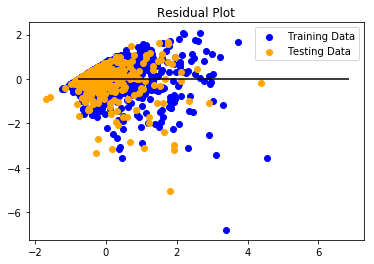

In [46]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5194920840267114, R2: 0.5088513828977064
